# Execute the code below

In [ ]:
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

## You have now a DataFrame with lots of weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :
# Let's go in the deep !

## 1 - Merge
OK, you know very well the previous dataset. Now, you want more, much more. Another year for example ?

But it's too bad. The year 2018 is not in the good  shape. There are 2 files :
- The main file with Temperature, etc...
- The opinion file, with especially the Opinion

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name). 

Think about checking if both datasets have the same length. If they don't, what kind of merge do you have to do to keep each date of the main dataset ? Then apply this specific merge. 

In [ ]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [ ]:
# Your code here :
df2018 = pd.merge(df_main, df_opinion,
                 how='left',
                 left_on='DATE',
                 right_on='date')
df2018.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,2018-01-01,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,2018-01-02,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,2018-01-03,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,2018-01-04,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,2018-01-05,116.0,0.0,3.0,6.9,bad


In [ ]:

df2018.shape

(365, 21)

### Result

Your DataFrame **df2018** should now have 21 columns and 365 rows. If not, try again.

**Be careful:** 
- if you've renamed your `date` column, then merged both DataFrames with `on` parameter, Pandas kept only one `DATE` column. So you'll have 20 columns in your DataFrame. And you can skip the "drop" step just after.
- if you merged with `left_on` and `right_on` parameters, Pandas kept both columns `DATE` and `date`, and you'll have 21 columns in your DataFrame. You can do this "drop" step:



In [ ]:
# You should now probably drop the "date" column. 
# This column is incomplete, it were provided from the opinion file. 
# It was very useful to perform the "merge". But we don't need it anymore.

# Read and execute the code below :
df2018.drop('date',             # Select column to drop
            axis = 1,           # Precise if you want to drop a column (1) or a row (0)
            inplace = True)     # If we don't use this argument, result is not stored

Now, everybody should have a 20 columns and 365 rows.

**Ohhhh, there are some missing values, we have to fill them. That will be the goal of this quest: to learn how to fill in the missing values, column by column, with different techniques.**

In [ ]:
# Just execute the code below, to display a "non-null" column :
print("My DataFrame shape is : ", df2018.shape, end = '\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
print(df2018.info())


My DataFrame shape is :  (365, 20)



Which columns have missing values ? (Non-null column)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEW

### Find and display the Dates of missing values.
You can help you with the method `.isna()`

You have to find 24 different dates.

In [ ]:
# Your code here :
print(df2018[df2018.isna().any(axis=1)])

           DATE  MAX_TEMPERATURE_C  ...  SUNHOUR  OPINION
18   2018-01-19                 10  ...      NaN      NaN
31   2018-02-01                  8  ...      NaN      NaN
66   2018-03-08                 13  ...      NaN      NaN
100  2018-04-11                 15  ...      NaN      NaN
118  2018-04-29                 10  ...      NaN      NaN
143  2018-05-24                 23  ...      NaN      NaN
152  2018-06-02                 23  ...      NaN      NaN
163  2018-06-13                 20  ...      NaN      NaN
165  2018-06-15                 19  ...      NaN      NaN
175  2018-06-25                 25  ...      NaN      NaN
184  2018-07-04                 25  ...      NaN      NaN
191  2018-07-11                 23  ...      NaN      NaN
194  2018-07-14                 28  ...      NaN      NaN
197  2018-07-17                 23  ...      NaN      NaN
204  2018-07-24                 29  ...      NaN      NaN
220  2018-08-09                 20  ...      NaN      NaN
225  2018-08-1

## 2 - Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

In [ ]:
# Just execute the code below :
df2018['flag'] = df2018['OPINION'].isna()
df2018['flag'].value_counts()

False    341
True      24
Name: flag, dtype: int64

## 3 - Visualize and Fill the NaN

### 3.1 - First column : WEATHER_CODE_EVENING

You have to visualize how are the well-filled data. Of course you know Matplotlib, and maybe, you know Seaborn and Plotly. But, did you know that Pandas integrate directly some parts of Matplotlib ? It's very useful, and don't need to import other libraries...

#### Scatterplot directly with Pandas

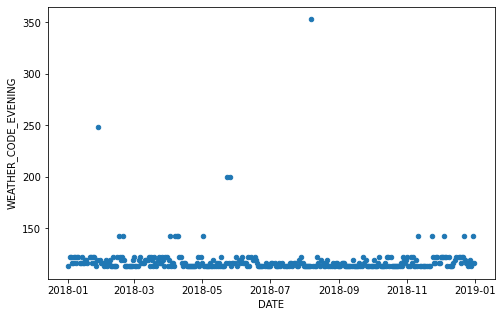

In [ ]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis
df2018['DATE'] = pd.to_datetime(df2018['DATE'])
df2018.plot.scatter('DATE', 'WEATHER_CODE_EVENING', figsize=(8, 5))

#### Boxplot directly with Pandas

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

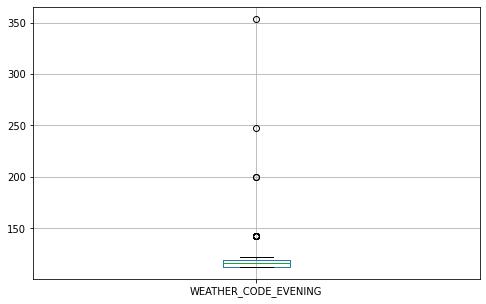

In [ ]:
# Find a way to draw directly with pandas a boxplot on the column WEATHER_CODE_EVENING
df2018.boxplot('WEATHER_CODE_EVENING', figsize=(8, 5))

#### Deciles

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [ ]:
# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop

print(df2018['WEATHER_CODE_EVENING'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

print('Min =', min(df2018['WEATHER_CODE_EVENING']))
print('Max =', max(df2018['WEATHER_CODE_EVENING']))


0.1    113.0
0.2    113.0
0.3    113.0
0.4    113.0
0.5    116.0
0.6    116.0
0.7    119.0
0.8    122.0
0.9    122.0
Name: WEATHER_CODE_EVENING, dtype: float64
Min = 113.0
Max = 353.0


#### Fill values
OK it seems that the most of datas are between 113 and 122. Maybe, we could fill the missing values with Mean or Median, it's up to you to choose. So you need :
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the `fillna()` method 

When you're OK, remember tu use the `inplace=True` argument, otherwise, your modification will not be stored.

In [ ]:
# Hop ! Your code here :

mean_weather_column =df2018['WEATHER_CODE_EVENING'].mean()      #You have to complete this
df2018['WEATHER_CODE_EVENING'].fillna(mean_weather_column, 
                                      inplace = True) # When you are OK, you can replace this argument by True
df2018['WEATHER_CODE_EVENING'].value_counts()

113.000000    154
116.000000     78
122.000000     59
119.000000     34
118.507331     24
143.000000     12
200.000000      2
353.000000      1
248.000000      1
Name: WEATHER_CODE_EVENING, dtype: int64

In [ ]:
# You can use this code to check how many missing values you have :
column_name = 'WEATHER_CODE_EVENING'
print("I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column WEATHER_CODE_EVENING


### 3.2 - Next columns : TOTAL_SNOW_MM and UV_INDEX

We trust you to choose right values to fill for both columns

In [ ]:
# Your code here

mean_total_snow=df2018['TOTAL_SNOW_MM'].mean()
df2018['TOTAL_SNOW_MM'].fillna(mean_total_snow,
                               inplace=True)
df2018['TOTAL_SNOW_MM'].value_counts()

0.0    365
Name: TOTAL_SNOW_MM, dtype: int64

In [ ]:
print("I have", df2018['TOTAL_SNOW_MM'].isna().sum(), "missing values in the column", "TOTAL_SNOW_MM")

I have 0 missing values in the column TOTAL_SNOW_MM


In [ ]:
mean_uv_index=df2018['UV_INDEX'].mean()
df2018['UV_INDEX'].fillna(mean_uv_index,
                          inplace=True)
df2018['UV_INDEX'].value_counts()

1.00000    260
3.00000     30
4.00000     26
1.57478     24
2.00000     14
5.00000     11
Name: UV_INDEX, dtype: int64

In [ ]:
print("I have", df2018['UV_INDEX'].isna().sum(), "missing values in the column", "UV_INDEX")

I have 0 missing values in the column UV_INDEX


### 3.3 - Next column : 
SUNHOUR

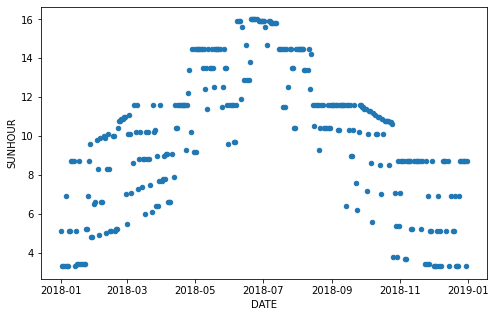

In [ ]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis

df2018.plot.scatter('DATE', 'SUNHOUR', figsize=(8, 5))

#### Propagation
**It seems this is not a good idea to apply the same value all year long...**

You could use the the `method = 'ffill'` or `'bfill'` argument in `fill_na()` to propagate non-null values forward or backward.

In [ ]:
# Your code here
df2018['SUNHOUR'].fillna(method="ffill", 
                        inplace = True)
df2018['SUNHOUR'].isna().sum()

0

### 3.4 - Column : OPINION
For Opinion, we have not yet idea. So, we can write a new value 'unknown' in this column.

In [ ]:
# Your code here
df2018['OPINION'].fillna('unknown', 
                        inplace = True)
df2018[df2018['OPINION'] == 'unknown'].head()


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,118.507331,0.0,1.57478,3.4,unknown,True
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,118.507331,0.0,1.57478,6.6,unknown,True
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,118.507331,0.0,1.57478,11.6,unknown,True
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,118.507331,0.0,1.57478,9.1,unknown,True
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,118.507331,0.0,1.57478,14.5,unknown,True


## Now, each axis should have 365 non-null values.

In [ ]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

## 4 - Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 numeric modified columns on Y-axis :
- The original datas will be in blue
- The new data (your datas) in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in seaborn with `hue` argument.

You should get something like this:

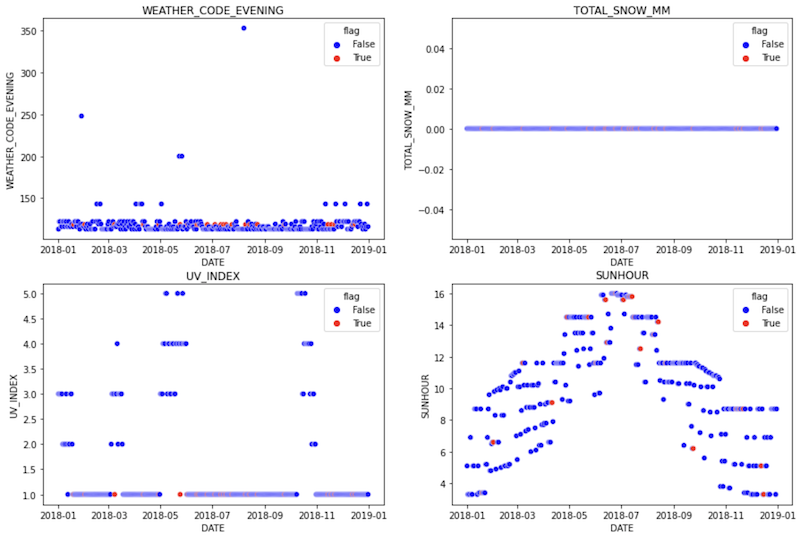

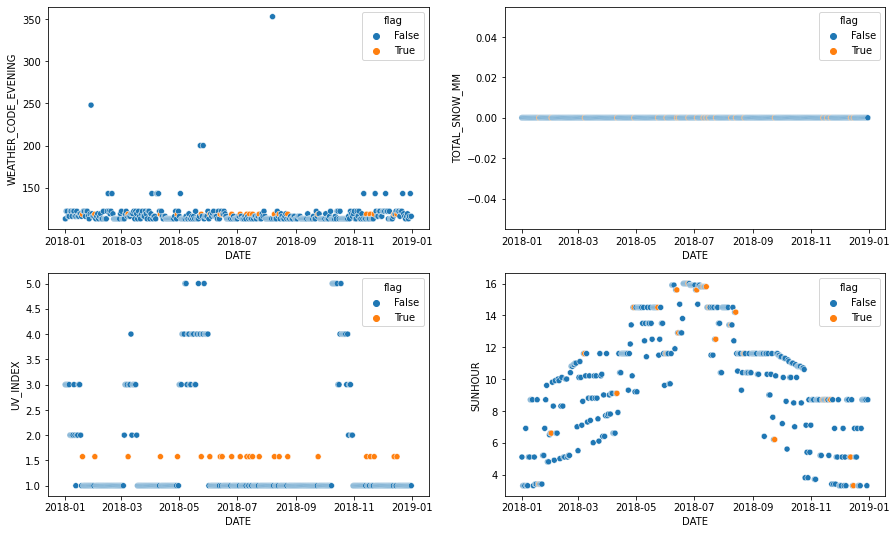

In [ ]:
# Your code here

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 9))

plt.subplot(2, 2, 1)
sns.scatterplot(data = df2018, x = "DATE", y = "WEATHER_CODE_EVENING", hue = "flag") 

plt.subplot(2, 2, 2)
sns.scatterplot(data = df2018, x = "DATE", y = "TOTAL_SNOW_MM", hue = "flag")

plt.subplot(2, 2, 3)
sns.scatterplot(data = df2018, x = "DATE", y = "UV_INDEX", hue = "flag")

plt.subplot(2, 2, 4)
sns.scatterplot(data = df2018, x = "DATE", y = "SUNHOUR", hue = "flag")

plt.show()

# Missions for the new quest

Create a translate function which translates each of the 5 possible values present in OPINION into French. Your function must take a str as a parameter, and return another str with the translation. For example: translate ("bad") must return "bad". Ditto for very bad, not good not bad, good and very good. You can use a dict dictionary, or nested conditions (the dictionary is more elegant). Be careful, you must foresee the case where the supplied argument is not one of the 5 values, and then return the text unchanged. For example: translate ("hello") should return "hello". *

In [ ]:
df2018.info() #checking if we dont have any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

In [ ]:
#creation of function with dictionary
traductions= {"very good": "très bien",
              "good": "bien",
              "not good not bad":"ni bon ni mauvais",
              "bad":"mauvais",
              "very bad":"très mauvais"}

print((lambda x : traductions.get(x,x))("bad"))
print((lambda x : traductions.get(x,x))("test"))  #if unexisting value in dict, will return what's after the coma

mauvais
test


Apply with apply your function to the OPINION Series, verify that it works, then store the result in this same OPINION column.


In [ ]:

#apply the function on OPINION column and store the result there
new_col=df2018['OPINION'].apply(lambda x : traductions.get(x,x))
new_col

0           mauvais
1           mauvais
2           mauvais
3           mauvais
4           mauvais
           ...     
360    très mauvais
361    très mauvais
362    très mauvais
363    très mauvais
364    très mauvais
Name: OPINION, Length: 365, dtype: object

In [ ]:
df2018["OPINION"]=new_col
df2018.head(5) 

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,mauvais,False,1,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,mauvais,False,1,2
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,mauvais,False,1,3
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,mauvais,False,1,4
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,mauvais,False,1,5


Use apply to create a new MONTH column that will contain the number of the month (from 1 to 12). You can define a function, or use a lambda function.

In [ ]:
#with lambda
df2018["MONTH_NUMBER"]=df2018["DATE"].apply(lambda x: x.month)
df2018.head(1)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY,MONTH_NUMBER
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.75,12,8,7,113.0,0.0,3.0,5.1,mauvais,False,1,1,1


In [ ]:
#alternative of Dataframe
df2018["MONTH_NUMBER"]=df2018["DATE"].dt.month
df2018.head(1)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH_NUMBER
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.75,12,8,7,113.0,0.0,3.0,5.1,mauvais,False,1


In [ ]:
#Use apply to create a new DAY column that will contain the day number (from 1 to 31). You can define a function, or use a lambda function
df2018["DAY"]=df2018["DATE"].apply(lambda x: x.day)
df2018.head(3)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH_NUMBER,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,mauvais,False,1,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,mauvais,False,1,2
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.5,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,mauvais,False,1,3


In [ ]:
#alternative of dataframe
df2018["DAY"]=df2018["DATE"].dt.day 
df2018.head(3)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH_NUMBER,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,mauvais,False,1,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,mauvais,False,1,2
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.5,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,mauvais,False,1,3


Concatenate the lines of the DataFrame 2018, with those of 2019 (you had to import it at the top of your notebook).


In [ ]:
# DF de 2019
df_weather.head(5)

#rename colonne "MONTH_NUMBER" en "MONTH" to be indentics 
df2018.rename(columns={"MONTH_NUMBER": "MONTH"}, inplace=True)
df2018.head(5)

#concatenation of dfs
new_df= pd.concat([df2018,df_weather], ignore_index=True)
new_df.head(5) #check if starts with  2018
new_df.tail(5) #check if starts with 2019

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY,WEATHER_CODE_MORNING,WEATHER_CODE_NOON
725,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,1033,57.625,13,10,8,116.0,0.0,1.0,8.7,not good not bad,NaN,12,27,119.0,143.0
726,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,1035,39.500,11,9,4,116.0,0.0,1.0,6.9,very bad,NaN,12,28,143.0,116.0
727,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,1034,4.000,9,4,0,116.0,0.0,1.0,8.7,very bad,NaN,12,29,116.0,116.0
728,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,1033,1.875,12,4,4,113.0,0.0,1.0,8.7,very bad,NaN,12,30,113.0,113.0
729,2019-12-31,10,4,13,4,7,9,0.1,94,9.000,1031,32.125,10,8,1,119.0,0.0,1.0,8.7,very bad,NaN,12,31,113.0,143.0


In [ ]:
#check the df if they correspond with conditions
print("shape of new dataframe is:", new_df.shape) #ALL OK 
print() 
#je vérifie si j'ai bien 3 colonnes a 365 NON-NULL et le reste a 730
new_df.info() #good


shape of new dataframe is: (730, 26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    730 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       730 non-null    int64         
 2   MIN_TEMPERATURE_C       730 non-null    int64         
 3   WINDSPEED_MAX_KMH       730 non-null    int64         
 4   TEMPERATURE_MORNING_C   730 non-null    int64         
 5   TEMPERATURE_NOON_C      730 non-null    int64         
 6   TEMPERATURE_EVENING_C   730 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     730 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    730 non-null    int64         
 9   VISIBILITY_AVG_KM       730 non-null    float64       
 10  PRESSURE_MAX_MB         730 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  730 non-null    float64       
 12  HEATINDEX_MA

Utilise apply pour créer une 26e colonne YEAR qui contiendra le numéro de l'année (2018 ou 2019). Tu peux définir une fonction, ou utiliser une fonction lambda.

In [ ]:
#je convertis la colonne DATE en objet datetime 
new_df["DATE"]= pd.to_datetime(new_df["DATE"])

#lambda function for creating the year column
new_df["YEAR"]=new_df["DATE"].apply(lambda x: x.year)

#check if all is good (2018, 2019)
new_df.head(5)
new_df.tail(5)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,YEAR
725,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,1033,57.625,13,10,8,116.0,0.0,1.0,8.7,not good not bad,NaN,12,27,119.0,143.0,2019
726,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,1035,39.500,11,9,4,116.0,0.0,1.0,6.9,very bad,NaN,12,28,143.0,116.0,2019
727,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,1034,4.000,9,4,0,116.0,0.0,1.0,8.7,very bad,NaN,12,29,116.0,116.0,2019
728,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,1033,1.875,12,4,4,113.0,0.0,1.0,8.7,very bad,NaN,12,30,113.0,113.0,2019
729,2019-12-31,10,4,13,4,7,9,0.1,94,9.000,1031,32.125,10,8,1,119.0,0.0,1.0,8.7,very bad,NaN,12,31,113.0,143.0,2019


Draw the following 4 graphs to compare 2018 and 2019:

-Wind speed histogram

-Boxplots for precipitation

-Scatterplots for the SUNHOUR and the date

-Violinplots for maximum temperature

On each graph, we can read if 2018 and 2019 are different or similar, so use color to distinguish them!

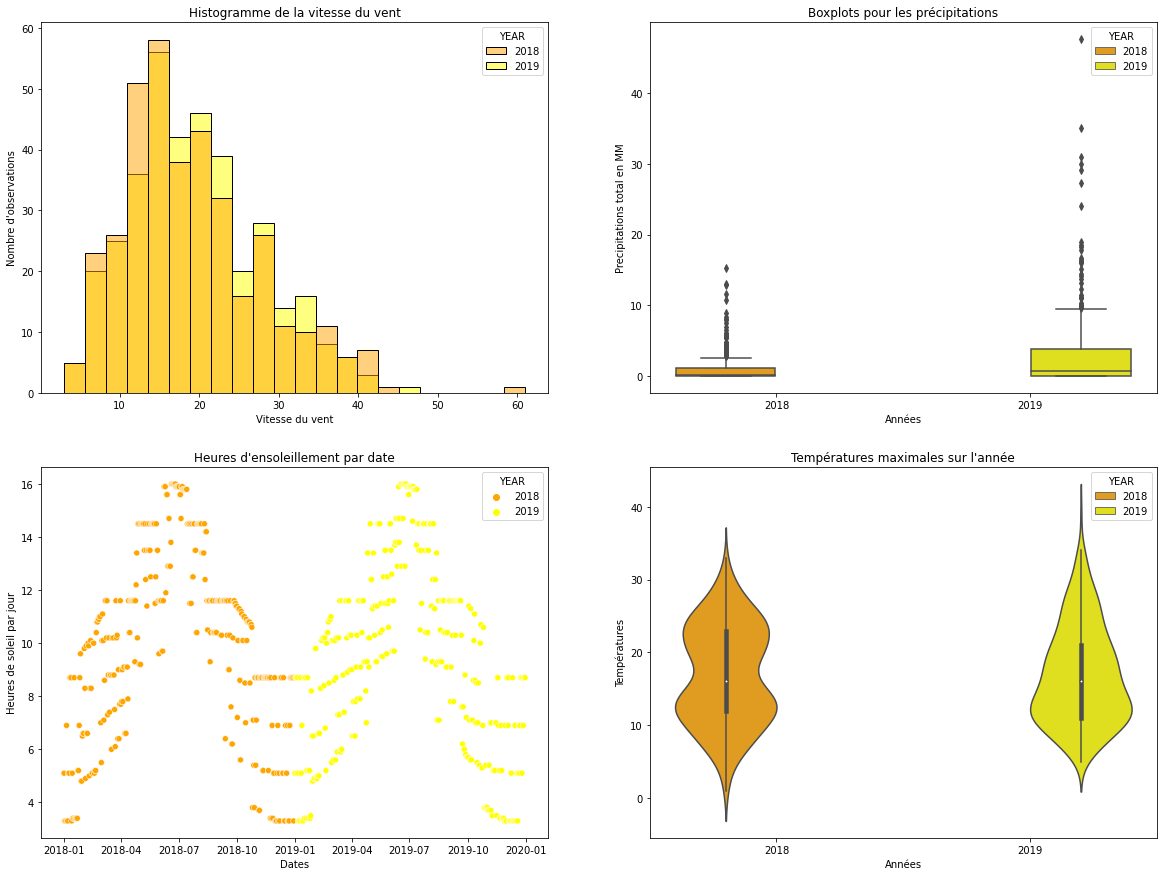

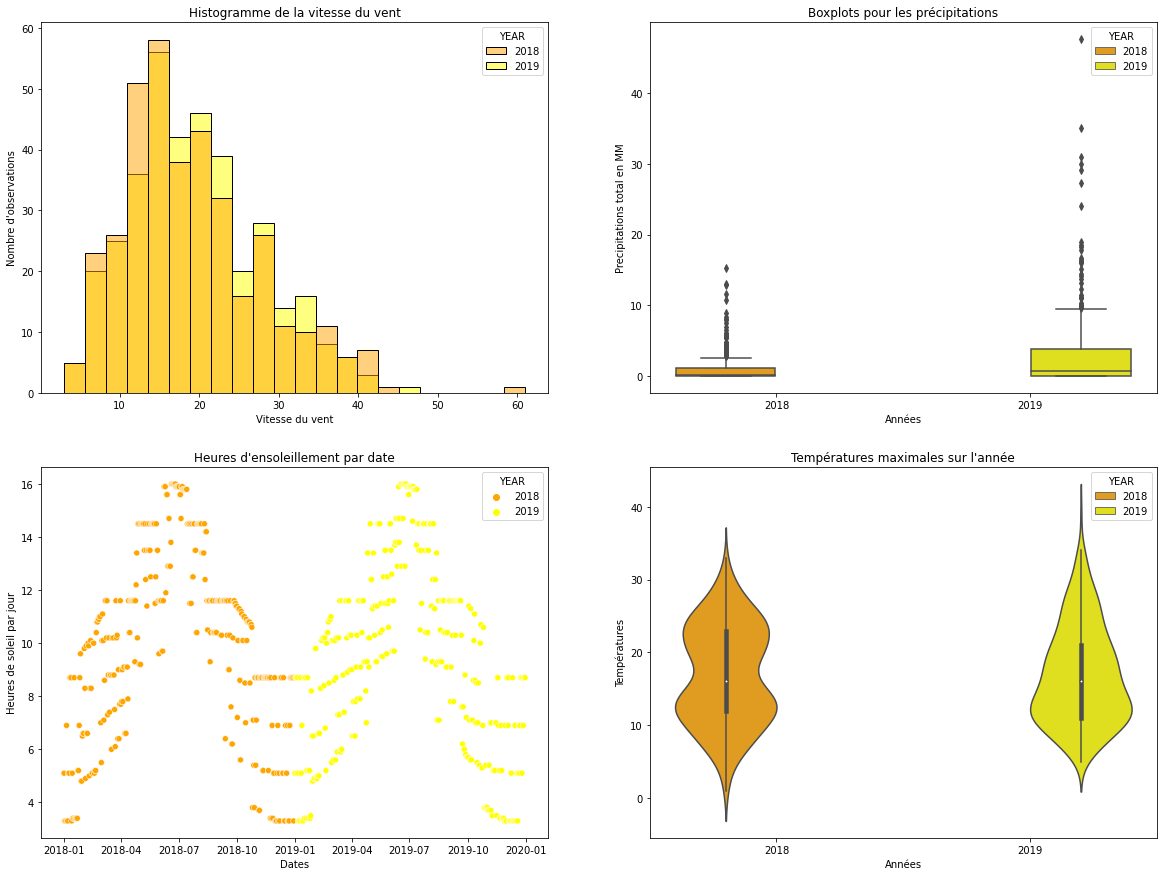

In [ ]:
#j'importe le néc pour faire les graphiques
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#declaration of figure
fig= plt.figure(figsize=(20,15))

#graphic 1
ax1= fig.add_subplot(221)
ax1=sns.histplot(data=new_df, x="WINDSPEED_MAX_KMH", hue="YEAR", palette=["orange","yellow"])
plt.xlabel('Vitesse du vent')
plt.ylabel('Nombre d\'observations')
plt.title('Histogramme de la vitesse du vent');

#graphic 2
ax2= fig.add_subplot(222)
ax2=sns.boxplot(data=new_df, y="PRECIP_TOTAL_DAY_MM", x="YEAR", hue="YEAR", palette=["orange","yellow"])
plt.xlabel('Années')
plt.ylabel('Precipitations total en MM')
plt.title('Boxplots pour les précipitations');

#graphic 3
ax3= fig.add_subplot(223)
ax3=sns.scatterplot(data=new_df, y="SUNHOUR", x="DATE", hue="YEAR", palette=["orange","yellow"], ci=None)
plt.xlabel('Dates')
plt.ylabel('Heures de soleil par jour')
plt.title('Heures d\'ensoleillement par date');

#graphic 4
ax4= fig.add_subplot(224)
ax4=sns.violinplot(data=new_df, y="MAX_TEMPERATURE_C", x="YEAR", hue="YEAR", palette=["orange","yellow"], ci=None)
plt.xlabel('Années')
plt.ylabel('Températures')
plt.title('Températures maximales sur l\'année');